INTRODUCTION:

We are curious about what attributes contribute to an apple’s quality. Therefore, we decided to explore the open dataset 'Apple Quality' to find out. The question we want to ask is: Based on an apple's sweetness and crunchiness, will the quality of the apple be good or bad?

This dataset comprises 4000 observations and contains information about various attributes of apples, including details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality. After experimenting with multiple variables, we found that good-quality apples tend to have better crunchiness and sweetness. Therefore, we will utilize the numerical variables 'sweetness' and 'crunchiness', both represented as doubles (dbl), as predictor variables, along with the categorical variable 'quality' as the response variable, to predict whether the apples are of good or bad quality.


METHODS:

We will conduct our data analysis by using a colored scatter plot. The x-axis will show apple crunchiness, the y-axis will show apple sweetness and the colors will show if the apple quality is good, bad, or not applicable. We will use the “Crunchiness” column to showcase how crunchy the apple is, the “Sweetness” column to show how sweet the apple is, and the “Quality” column to denote if the apple’s quality is good or bad.

OUTCOMES AND SIGNIFICANCE:

We aim to predict the quality of apples given the variables of their crunchiness and sweetness. We expect more apples to be good than bad, as there are more good apples overall in the dataset. We believe this predictor holds value in contributing to faster and more accurate classification of apples, which could result in better business insights, such as assisting with appropriate pricing and determining which market the apples should go to. It would also help with sorting out the bad apples from the good ones, allowing better overall customer satisfaction. In the visualization, we observe a slightly positive correlation between the crunchiness, sweetness, and quality of the apples. A future question that this could lead to is: How can we increase the sweetness and crunchiness of apples to improve their quality?


In [1]:
#Loading in the packages
library(tidyverse)
library(cowplot)
library(repr)
library(tidymodels)
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1

In [2]:
#Loading in the dataset
raw_data <- read_csv("data/apple_quality.csv")
raw_data_no_na <- na.omit(raw_data)
raw_data_no_na

Rows: 4001 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Acidity, Quality
dbl (7): A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,-3.97004852,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.491590483,good
1,-1.19521719,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.722809367,good
2,-0.29202386,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.621636473,bad
3,-0.65719577,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.790723217,good
4,1.36421682,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.501984036,good
5,-3.42539975,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.981523169,bad
6,1.33160574,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.414170509,good
7,-1.99546210,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.470125066,good
8,-3.86763223,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.871904758,bad


In [3]:
#Removing uneeded columns
mutated_data <- raw_data_no_na |>
    select(Crunchiness, Sweetness, Quality)
mutated_data

Crunchiness,Sweetness,Quality
<dbl>,<dbl>,<chr>
-1.01200871,5.3463296,good
1.58823231,3.6640588,good
-0.34261593,-1.7384292,bad
-0.09787472,1.3248738,good
-0.55300577,-0.3846582,good
-0.55577486,-1.9135112,bad
-1.67779794,0.8759742,good
-0.74297168,1.5306436,good
-1.20765455,0.9864291,bad


In [4]:
#Factorizing the quality column
factored_data <- mutated_data |>
    mutate(Quality = as_factor(Quality))
factored_data

Crunchiness,Sweetness,Quality
<dbl>,<dbl>,<fct>
-1.01200871,5.3463296,good
1.58823231,3.6640588,good
-0.34261593,-1.7384292,bad
-0.09787472,1.3248738,good
-0.55300577,-0.3846582,good
-0.55577486,-1.9135112,bad
-1.67779794,0.8759742,good
-0.74297168,1.5306436,good
-1.20765455,0.9864291,bad


In [5]:
#Set the seed
set.seed(1)

#Spliting the dataset into training(80%)/testing(20%)
data_split <- initial_split(factored_data, prop = 0.8, strata = Quality)
data_train <- training(data_split)
data_test <- testing(data_split)

glimpse(data_train)

Rows: 3,199
Columns: 3
$ Crunchiness <dbl> -0.34261593, -0.62554577, 0.90975851, 3.46510848, 0.762391…
$ Sweetness   <dbl> -1.7384292, -1.4185069, -2.2143729, -2.4423372, -3.4526277…
$ Quality     <fct> bad, bad, bad, bad, bad, bad, bad, bad, bad, bad, bad, bad…


In [6]:
#Calculate proportions for good and bad qualities
data_proportions <- data_train |>
                      group_by(Quality) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(data_train))

data_proportions

Quality,n,percent
<fct>,<int>,<dbl>
good,1603,50.10941
bad,1596,49.89059


In [7]:
#Summarizing the data
summarized_data <- data_train |>
    summarize(mean_crunchiness = mean(Crunchiness, na.rm = TRUE),
              mean_sweetness = mean(Sweetness, na.rm = TRUE))
summarized_data


mean_crunchiness,mean_sweetness
<dbl>,<dbl>
0.9749632,-0.4519721


In [8]:
#Create knn spec
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
      set_engine("kknn") |>
      set_mode("classification")
knn_spec

#Create knn recipe
apple_recipe <- recipe(Quality ~ Sweetness + Crunchiness, data = data_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
apple_recipe

#Create the knn worflow
apple_workflow <- workflow() |>
    add_recipe(apple_recipe) |>
      add_model(knn_spec) |>
      fit(data = data_train)
apple_workflow

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4029384
Best kernel: rectangular
Best k: 5

In [9]:
#Set the seed
set.seed(1)

#Predictions
apple_test_predictions <- predict(apple_workflow, data_test) |>
      bind_cols(data_test)
apple_test_predictions

.pred_class,Crunchiness,Sweetness,Quality
<fct>,<dbl>,<dbl>,<fct>
bad,-0.55577486,-1.9135112,bad
good,-1.20765455,0.9864291,bad
bad,0.59751292,-4.0922228,bad
bad,2.41315532,-1.7718447,bad
bad,1.75481293,2.0441438,good
bad,0.89458086,-1.0197973,good
bad,0.63010617,0.1460304,bad
bad,1.78671619,-0.7435187,bad
good,-0.16414062,3.6854368,good


In [10]:
#Accuracy check
apple_prediction_accuracy <- apple_test_predictions |>
        metrics(truth = Quality, estimate = .pred_class)    
apple_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5717853
kap,binary,0.1435879


In [11]:
#Set the seed
set.seed(1)

#Confusion matrix
apple_matrix <- apple_test_predictions |> 
      conf_mat(truth = Quality, estimate = .pred_class)
apple_matrix

          Truth
Prediction good bad
      good  226 168
      bad   175 232

In [12]:
#Precision
226/394

#Recall
226/401

[1] 0.5736041

[1] 0.563591

In [13]:
#Set the seed
set.seed(1)

#Create cross validation with 5 folds
vfold <- vfold_cv(data_train, v = 5, strata = Quality)

In [14]:
#Set the seed
set.seed(1)

#Create knn spec to determine best K
tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("classification") 
tune_spec

#Create knn workflow to determine best K
tune_workflow <- workflow() |>
      add_recipe(apple_recipe) |>
      add_model(tune_spec) |>
      tune_grid(resamples = vfold) |>
      collect_metrics()
tune_workflow

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.5698470,5,0.011801642,Preprocessor1_Model01
2,roc_auc,binary,0.6078684,5,0.014590230,Preprocessor1_Model01
3,accuracy,binary,0.5939154,5,0.009499915,Preprocessor1_Model02
3,roc_auc,binary,0.6211007,5,0.010437158,Preprocessor1_Model02
5,accuracy,binary,0.6039189,5,0.012924873,Preprocessor1_Model03
5,roc_auc,binary,0.6401301,5,0.011096908,Preprocessor1_Model03
6,accuracy,binary,0.6039189,5,0.012924873,Preprocessor1_Model04
6,roc_auc,binary,0.6421460,5,0.010197407,Preprocessor1_Model04
7,accuracy,binary,0.6064233,5,0.008221062,Preprocessor1_Model05


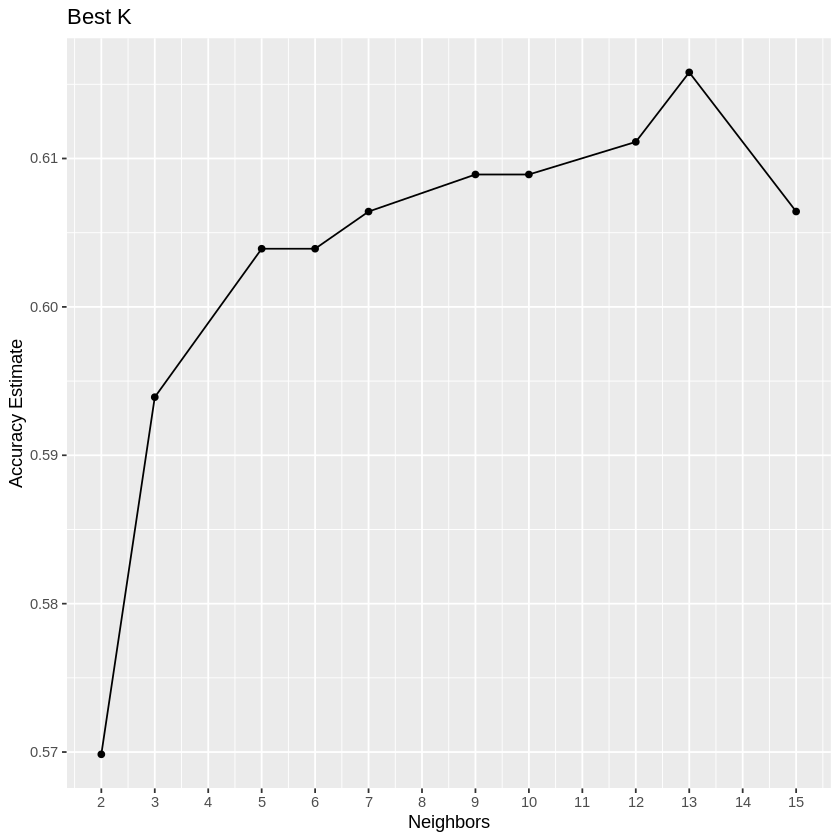

In [15]:
#Plotting graph to determine best K
accuracies <- tune_workflow |> 
      filter(.metric == "accuracy")
accuracy_versus_k <- accuracies |>
    ggplot(aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Best K") +
    scale_x_continuous(breaks = seq(0, 16, by = 1))
accuracy_versus_k

In [18]:
#Set the seed
set.seed(1)

#Create new knn spec with best K
apple_tuned_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
  set_engine("kknn") |>
  set_mode("classification")

#Create new workflow with new knn spec
apple_tuned_workflow <- workflow() |>
    add_recipe(apple_recipe) |>
    add_model(apple_tuned_spec) |>
    fit(data = data_train)
apple_tuned_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(13,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3860581
Best kernel: rectangular
Best k: 13

In [20]:
#Set the seed
set.seed(1)

apple_tuned_test_predictions <- predict(apple_tuned_workflow, data_test) |>
  bind_cols(data_test)
apple_tuned_test_predictions

.pred_class,Crunchiness,Sweetness,Quality
<fct>,<dbl>,<dbl>,<fct>
bad,-0.55577486,-1.9135112,bad
good,-1.20765455,0.9864291,bad
bad,0.59751292,-4.0922228,bad
good,2.41315532,-1.7718447,bad
bad,1.75481293,2.0441438,good
bad,0.89458086,-1.0197973,good
bad,0.63010617,0.1460304,bad
bad,1.78671619,-0.7435187,bad
good,-0.16414062,3.6854368,good


In [21]:
#Accuracy check
apple_tuned_prediction_accuracy <- apple_tuned_test_predictions |>
        metrics(truth = Quality, estimate = .pred_class)    
apple_tuned_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6017478
kap,binary,0.2035068


In [23]:
#Set the seed
set.seed(1)

#Confusion matrix
apple_tuned_matrix <- apple_tuned_test_predictions |> 
      conf_mat(truth = Quality, estimate = .pred_class)
apple_tuned_matrix

          Truth
Prediction good bad
      good  239 157
      bad   162 243

In [24]:
#Precision
239/396

#Recall
239/401

[1] 0.6035354

[1] 0.59601